In [1]:
import gymnasium as gym
from scripts.DQN_Optimizer import DQN_Optimizer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
env = gym.make("CartPole-v1")

In [3]:
#####################################
## TEST LEARNING RATES/ Batch size
#######################################

param_dict = {
                "batch_size" : 128,
                "gamma" : 0.99,
                "eps_start" : 0.99,
                "eps_end" : 0.1,
                # "decay_steps" : 100000,
                "eps_decay" : 0.95,
                "learning_rate" : 5e-4,
                "train_episodes" : 200,
                "test_episodes" : 20,
                "steps_between_updates": 50
                }

In [4]:
seed_rewards = []
steps_arr = ['sgd','adam','RMSProp']
nb_seeds = len(steps_arr)
for seed in range(nb_seeds):
    dqn_opt = DQN_Optimizer(env = env, replay_memory_size= 10000, param_dict=param_dict)
    dqn_opt.set_optimizer('adam')
    seed_rewards.append(dqn_opt.run_optimization())

pytorch will run on cpu
The specified number of episodes might be big for optimization on cpu
Filling buffer memory...
Buffer memory filled, size: 10000


Current train episode eps : 0.10: 100%|██████████| 200/200 [00:15<00:00, 12.80it/s]


Optimization complete
pytorch will run on cpu
The specified number of episodes might be big for optimization on cpu
Filling buffer memory...
Buffer memory filled, size: 10000


Current train episode eps : 0.10: 100%|██████████| 200/200 [07:57<00:00,  2.39s/it]


Optimization complete
pytorch will run on cpu
The specified number of episodes might be big for optimization on cpu
Filling buffer memory...
Buffer memory filled, size: 10000


Current train episode eps : 0.10: 100%|██████████| 200/200 [06:21<00:00,  1.91s/it]

Optimization complete


In [7]:
def plot_rewards(seed_rewards, individual = False):

    flat_rewards = []
    episode = []
    seeds = []

    for seed, rewards in enumerate(seed_rewards):
        for episode_idx, reward in enumerate(rewards):
            flat_rewards.append(reward)
            episode.append(episode_idx*10)
            seeds.append(str(steps_arr[seed]))

    df = pd.DataFrame({
        'Episode': episode,
        'Reward': flat_rewards,
        'optimizer': seeds
    })
    print(df)
    # Plot the data
    plt.figure(figsize=(10, 6))
    if individual:
        sns.lineplot(data=df, x='Episode', y='Reward', hue = "optimizer", legend="full")
    else:
        sns.lineplot(data=df, x='Episode', y='Reward')
        
    plt.title('Test rewards over episodes')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.show()

    Episode  Reward optimizer
0         0    9.60       sgd
1        10   46.55       sgd
2        20    9.20       sgd
3        30    9.50       sgd
4        40    9.30       sgd
5        50    9.30       sgd
6        60    9.05       sgd
7        70    9.20       sgd
8        80    9.30       sgd
9        90    9.55       sgd
10      100    9.30       sgd
11      110    9.25       sgd
12      120    9.40       sgd
13      130    9.35       sgd
14      140    9.30       sgd
15      150    9.45       sgd
16      160    9.90       sgd
17      170    9.50       sgd
18      180    9.20       sgd
19      190    9.05       sgd
20        0    9.30      adam
21       10    9.35      adam
22       20   69.20      adam
23       30  196.75      adam
24       40  228.65      adam
25       50  228.85      adam
26       60  211.10      adam
27       70  211.00      adam
28       80  244.95      adam
29       90  353.65      adam
30      100  500.00      adam
31      110  174.75      adam
32      12

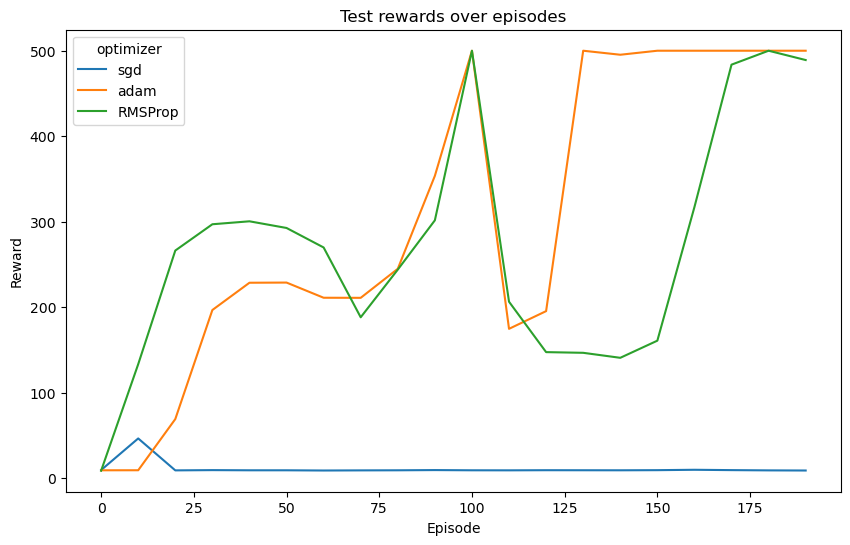

In [8]:
plot_rewards(seed_rewards, individual=True)

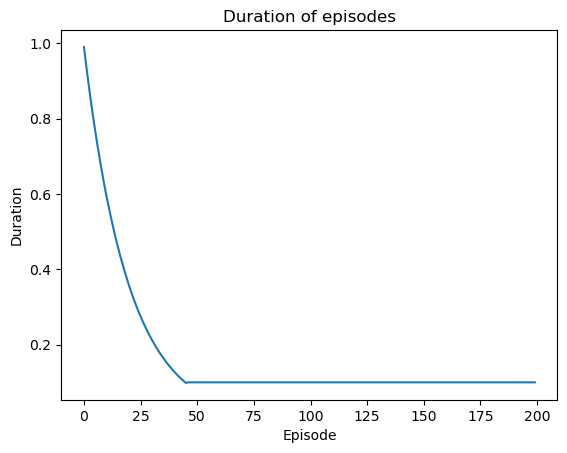

In [9]:
dqn_opt.plot_epsilons()